In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


preparing dataset for basic processing

In [2]:
mail=pd.read_csv('mails.csv',encoding='latin-1')
mail.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [3]:
print('shape = >',mail.shape)

shape = > (2893, 3)


there are 2893 rows and 3 columns in this dataset

In [4]:
print('ham and spam  counts','\n',mail.label.value_counts())

ham and spam  counts 
 0    2412
1     481
Name: label, dtype: int64


0 = ham and 1= spam
there are 2412 ham mails and 481 spam mails

In [5]:
#adding new column to length
mail['length']=mail.message.str.len()
mail.head(5)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [6]:
#describing labels
mail.groupby('label').describe()

length                                                               
        count         mean          std  min    25%     50%     75%      max
label                                                                       
0      2412.0  3031.415423  3267.807859  6.0  963.0  1977.5  3752.5  28649.0
1       481.0  3654.330561  5154.400909  6.0  547.0  1451.0  4710.0  28571.0

CLEANING THE DATA

In [7]:
#converting message to lower case
mail['message']=mail['message'].str.lower()
mail.head(5)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [8]:
#replace email address with 'email'
mail['message']=mail['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#replace URLs with 'web address'
mail['message']=mail['message'].str.replace(r'^httpp\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

#Replace moneysymbols with 'moneysymb'
mail['message']=mail['message'].str.replace(r'$','dollers')

#replace phone numbers with 'phonenumber
mail['message']=mail['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

#replace numbers with number
mail['message']=mail['message'].str.replace(r'\d+(\.\d+)?','number')

In [9]:
#remove punctuation
mail['message']=mail['message'].str.replace(r'[^\w\d\s]',' ')

#remove whitespace in between terms with single space
mail['message']=mail['message'].str.replace(r'\s+',' ')

#remove leadin and training white space
mail['message']=mail['message'].str.replace(r'^\s+|\s+?$',' ')


In [10]:
mail.head(10)

,subject,message,label,length
0,job posting - apple-iss research center,content length number apple iss research cente...,0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts : optimality in syntactic t...,content length number call for papers is the b...,0,4492
6,m . a . in scandinavian linguistics,m a in scandinavian linguistics at the univers...,0,2201
7,call for papers : linguistics session of the m...,call for papers linguistics session midwest mo...,0,802
8,foreign language in commercials,content length number greetings i m wondering ...,0,1230
9,fulbright announcement : please post / dissemi...,fulbright announcement please post disseminate...,0,1478


all the punctuations,symbols etc are converted to lower case words along with the whole message

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
### Dataset Preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(mail)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', mail['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
corpus

['content length number appl iss research center us doller number million joint ventur appl comput inc institut system scienc nation univers singapor locat singapor look senior speech scientist success candid research expertis comput linguist includ natur languag process english chines statist languag model knowledg state art corpu base n gram languag model cach languag model part speech languag model requir text speech project leader success candid research expertis expertis two follow area comput linguist includ natur languag pars lexic databas design statist languag model text token normal prosod analysi substanti knowledg phonolog syntax semant chines requir knowledg acoust phonet speech signal process desir candid phd least number number year relev work experi technic msc degre least number number year experienc e strong softwar engin skill includ design implement product requir posit knowledg c c unix prefer unix c programm look experienc unix c programm prefer good industri expe

In [14]:
#New column for length after removal of stopwords
mail['clean_length']=mail.message.str.len()
mail.head(10)

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length number apple iss research cente...,0,2856,2573
1,NaN,lang classification grimes joseph e and barbar...,0,1800,1711
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435,1377
3,risk,a colleague and i are researching the differin...,0,324,316
4,request book information,earlier this morning i was on the phone with a...,0,1046,956
5,call for abstracts : optimality in syntactic t...,content length number call for papers is the b...,0,4492,4169
6,m . a . in scandinavian linguistics,m a in scandinavian linguistics at the univers...,0,2201,2087
7,call for papers : linguistics session of the m...,call for papers linguistics session midwest mo...,0,802,750
8,foreign language in commercials,content length number greetings i m wondering ...,0,1230,1172
9,fulbright announcement : please post / dissemi...,fulbright announcement please post disseminate...,0,1478,1421


here we can see  the length of original message and length after cleaning

In [15]:
#total length removal
print('original length',mail.length.sum())
print('clean length',mail.clean_length.sum())

original length 9069507
clean length 8416405


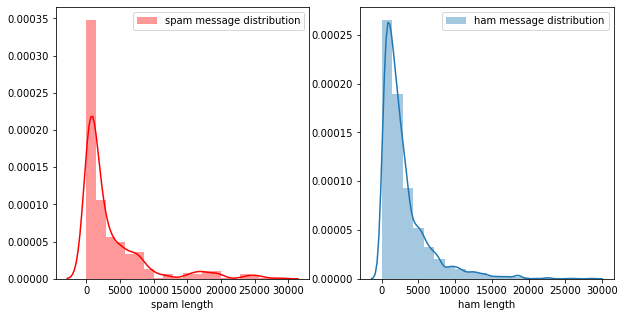

In [16]:
#message distribution before  cleaning
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(mail[mail['label']==1]['length'],bins=20,ax=ax[0],label='spam message distribution',color='r')

ax[0].set_xlabel('spam length')
ax[0].legend()

sns.distplot(mail[mail['label']==0]['length'],bins=20,ax=ax[1],label='ham message distribution')

ax[1].set_xlabel('ham length')
ax[1].legend()
plt.show()

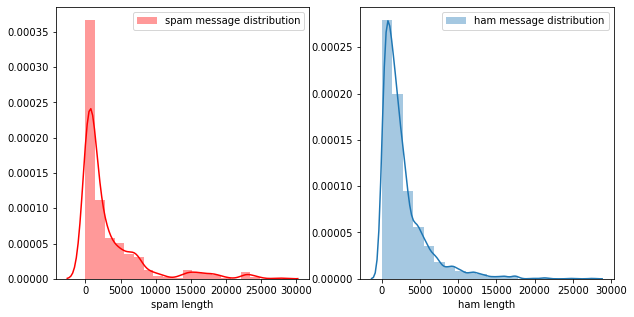

In [17]:
#message distribution after cleaning
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.distplot(mail[mail['label']==1]['clean_length'],bins=20,ax=ax[0],label='spam message distribution',color='r')

ax[0].set_xlabel('spam length')
ax[0].legend()

sns.distplot(mail[mail['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham message distribution')

ax[1].set_xlabel('ham length')
ax[1].legend()
plt.show()
f.savefig('mail distribution')

UNDERSTANDING THE TEXT DATA AND FINDING THE IMPORTANT WORDS

In [18]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


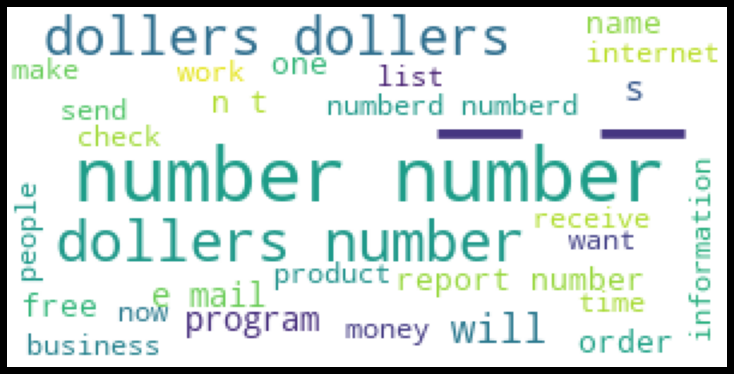

In [19]:
#loud words in spam
from wordcloud import WordCloud

spams=mail['message'][mail['label']==1]
spam_cloud=WordCloud(width=300,height=150,background_color='white',max_words=30).generate(''.join(spams))

plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

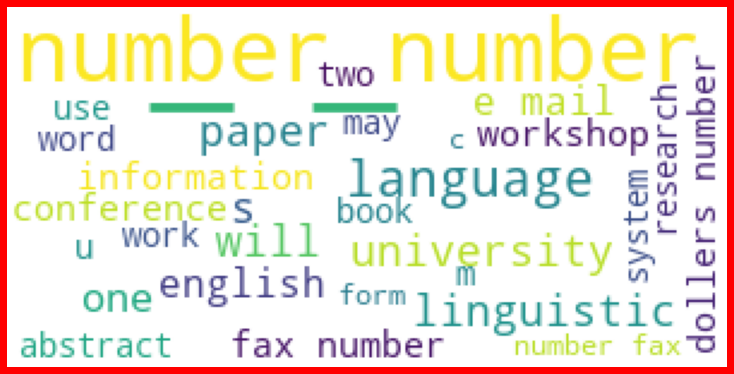

In [20]:
#loud words in ham

hams=mail['message'][mail['label']==0]
spam_cloud=WordCloud(width=300,height=150,background_color='white',max_words=30).generate(''.join(hams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

CONVERTING TEXT INTO VECTORS AND SPLITTING FEATURE AND LABEL

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

tf_vec=TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(mail['message'])

x=features
y=mail['label']

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc=  DecisionTreeClassifier()

max_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
   
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_score:
        max_score=acc_scr
        final_r_state=r_state
print("max accuracy score corresponding to",final_r_state,"is",max_score)

max accuracy score corresponding to 46 is 0.9717425431711146


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=46)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2256, 54495)
(637, 54495)
(2256,)
(637,)


In [25]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score : 0.9623233908948194
[[532   0]
 [ 24  81]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       532
           1       1.00      0.77      0.87       105

    accuracy                           0.96       637
   macro avg       0.98      0.89      0.92       637
weighted avg       0.96      0.96      0.96       637



In [26]:
#Random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20,random_state=68)
rf.fit(x_train,y_train)
print('score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print("Accuracy score :",accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

score: 0.999113475177305


Accuracy score : 0.9560439560439561
[[532   0]
 [ 28  77]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       532
           1       1.00      0.73      0.85       105

    accuracy                           0.96       637
   macro avg       0.97      0.87      0.91       637
weighted avg       0.96      0.96      0.95       637



In [30]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

Accuracy score : 0.8398744113029827
[[532   0]
 [102   3]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       532
           1       1.00      0.03      0.06       105

    accuracy                           0.84       637
   macro avg       0.92      0.51      0.48       637
weighted avg       0.87      0.84      0.77       637



In [31]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy score :",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score : 0.9701726844583988
[[528   4]
 [ 15  90]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       532
           1       0.96      0.86      0.90       105

    accuracy                           0.97       637
   macro avg       0.96      0.92      0.94       637
weighted avg       0.97      0.97      0.97       637



In [32]:
#AUC-ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [33]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

array([0.02355915, 0.0251527 , 0.01820925, 0.01916839, 0.03599855,
       0.04962535, 0.00774282, 0.07067892, 0.05889653, 0.02968348,
       0.08241274, 0.04992035, 0.04485582, 0.0470068 , 0.01676534,
       0.02035747, 0.07952591, 0.01022393, 0.07148848, 0.06361657,
       0.0196843 , 0.14909098, 0.02064615, 0.04549057, 0.02944932,
       0.02093048, 0.09432945, 0.06418194, 0.0324973 , 0.04352792,
       0.0199955 , 0.26142311, 0.03130632, 0.8250427 , 0.02802791,
       0.01648897, 0.70656994, 0.00908589, 0.03508389, 0.02554644,
       0.01706114, 0.04991246, 0.0309764 , 0.15335491, 0.03280348,
       0.05727938, 0.12577478, 0.04895992, 0.02570155, 0.58547423,
       0.05918155, 0.07470789, 0.01124848, 0.084325  , 0.04381963,
       0.07353408, 0.07137353, 0.06001359, 0.11892133, 0.0459845 ,
       0.01882251, 0.77623011, 0.04563469, 0.01358902, 0.7573979 ,
       0.04728313, 0.05823998, 0.05134683, 0.04678557, 0.0535395 ,
       0.65545321, 0.0693649 , 0.02795506, 0.0770663 , 0.07281

In [34]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0018797 , 0.0018797 , 0.0037594 , 0.0037594 , 0.0037594 ,
       0.0075188 , 0.0075188 , 0.02819549, 0.02819549, 0.9924812 ,
       0.9962406 , 1.        ])

In [35]:
tpr

array([0.        , 0.00952381, 0.23809524, 0.25714286, 0.87619048,
       0.87619048, 0.93333333, 0.93333333, 0.94285714, 0.98095238,
       0.98095238, 0.99047619, 0.99047619, 1.        , 1.        ,
       1.        , 1.        ])

In [36]:
thresholds

array([1.98327722, 0.98327722, 0.87404136, 0.86744009, 0.31562822,
       0.26763953, 0.22200294, 0.20919033, 0.20752304, 0.20359616,
       0.18441632, 0.18185531, 0.13287916, 0.13283558, 0.00694713,
       0.00679702, 0.00643752])

<function matplotlib.pyplot.show(*args, **kw)>

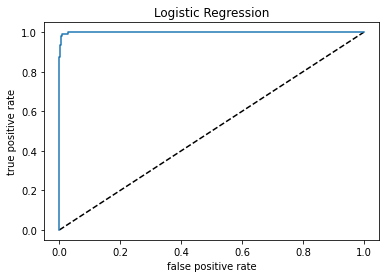

In [37]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Logistic Regression')
plt.show

In [38]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.8857142857142857


<function matplotlib.pyplot.show(*args, **kw)>

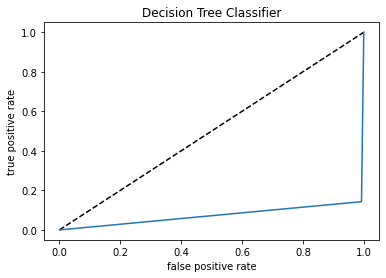

In [39]:
#Decision tree curve
y_pred_prob=dtc.predict_proba(x_test)[:,0]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decision Tree Classifier')
plt.show

In [40]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.8857142857142857


In [41]:
from sklearn.model_selection import cross_val_score

rf=RandomForestClassifier()
score=cross_val_score(rf,x,y,cv=5)
print("score:",score)
print("Mean score:",score.mean())
print("Standard deviation:",score.std())

score: [0.97236615 0.95682211 0.9671848  0.97231834 0.95155709]
Mean score: 0.964049697904154
Standard deviation: 0.008434048705724933


In [42]:
#saving randomforest classifier

import joblib
joblib.dump(rf,'rf_spam_detection.pkl')

['rf_spam_detection.pkl']